In [1]:
import sys
import os

# If the notebook is in a subfolder (e.g. 'notebooks/'):
# Add the parent directory (the project root) to the path
if '..' not in sys.path:
    sys.path.append('..')

# If CWD is already the root directory, but 'src' is not found:
# Adds the current directory
if '.' not in sys.path:
    sys.path.append('.')


# 0. Import and Functions

In [2]:
# Data preparation packages
import pandas as pd
import numpy as np
import category_encoders as ce

# Graphics packages
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz

# Auxiliary functions package
from src.a3data import preditiva

/Users/guedesf/Documents/Data Science/Projetos/a3data/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## 0.2 Loading Data

In [3]:
df = pd.read_csv('/Users/guedesf/Documents/Data Science/Projetos/a3data/data/raw/Customer-Churn - Customer-Churn.csv',
                 sep=',')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes


# 1. Data Discribe

## 1.1 Data Dimension

In [4]:
print( 'Number of Rows: {}'.format( df.shape[0] ) )
print( 'Number of Cols: {}'.format( df.shape[1] ) )

Number of Rows: 7043
Number of Cols: 21


## 1.2 Data Types

In [5]:
df.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

## 1.3 Check NA

In [6]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## 1.4 Check Duplicated

In [7]:
df.index.duplicated().sum()

0

## 1.5 Convert String to Numeric

In [8]:
if not pd.api.types.is_numeric_dtype(df['MonthlyCharges']):
    df['MonthlyCharges'] = df['MonthlyCharges'].astype(str).str.replace(',', '.')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

if not pd.api.types.is_numeric_dtype(df['TotalCharges']):
    df['TotalCharges'] = df['TotalCharges'].astype(str).str.replace(',', '.')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## 1.6 Fill NA Data

Based on my understanding of the data, the TotalCharge column refers to the total amount spent by the customer over the months of subscription (tenure x MonthlyCharge). Therefore, the missing data refers to customers whose tenure value is 0, indicating that these customers have not yet completed 1 month of subscription, but the payment for the first month has been made, so the missing data has been completed with values ​​equal to the MonthlyCharge.

In [10]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'])
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 1.7 EDA Report

In [11]:
perfil_pp, perfil_sv = preditiva.gera_relatorios_aed(df=df,
                                               target_feat='Churn')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 551.52it/s]
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 1.7.2 Correlation Analyses - Information Value

In [12]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

In [13]:
df_iv = preditiva.analise_iv(df, 'Churn')

df_iv.get_lista_iv()

/Users/guedesf/Documents/Data Science/Projetos/a3data/notebooks/../src/a3data/preditiva.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/guedesf/Documents/Data Science/Projetos/a3data/notebooks/../src/a3data/preditiva.py:47: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/Users/guedesf/Documents/Data Science/Projetos/a3data/notebooks/../src/a3data/preditiva.py:47: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/Users/gue

Churn,IV
Variavel,
Contract,1.24
tenure,0.81
OnlineSecurity,0.72
TechSupport,0.70
InternetService,0.62
OnlineBackup,0.52
DeviceProtection,0.50
PaymentMethod,0.46
StreamingMovies,0.38


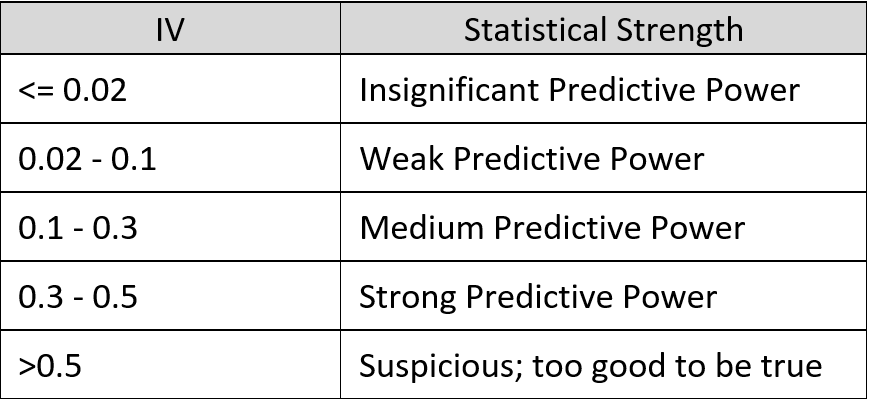

In [14]:
df_iv.get_bivariada(var_escolhida='Contract')

==> "Contract" tem IV de 1.24


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Contract,Month-to-month,1655.0,2220.0,3875.0,55.02,88.55,42.91,42.71,2.06,0.72,0.33
1,Contract,One year,166.0,1307.0,1473.0,20.91,8.88,25.26,11.27,0.35,-1.05,0.17
2,Contract,Two year,48.0,1647.0,1695.0,24.07,2.57,31.83,2.83,0.08,-2.53,0.74


In [15]:
df_iv.get_bivariada(var_escolhida='tenure')

==> "tenure" tem IV de 0.81


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,tenure,"(-0.01, 2.0]",503.0,359.0,862.0,12.24,26.91,6.94,58.35,3.88,1.36,0.27
1,tenure,"(2.0, 6.0]",281.0,338.0,619.0,8.79,15.03,6.53,45.40,2.30,0.83,0.07
2,tenure,"(6.0, 12.0]",253.0,452.0,705.0,10.01,13.54,8.74,35.89,1.55,0.44,0.02
3,tenure,"(12.0, 20.0]",214.0,478.0,692.0,9.83,11.45,9.24,30.92,1.24,0.22,0.00
4,tenure,"(20.0, 29.0]",158.0,533.0,691.0,9.81,8.45,10.30,22.87,0.82,-0.20,0.00
5,tenure,"(29.0, 40.0]",157.0,560.0,717.0,10.18,8.40,10.82,21.90,0.78,-0.25,0.01
6,tenure,"(40.0, 50.0]",115.0,537.0,652.0,9.26,6.15,10.38,17.64,0.59,-0.53,0.02
7,tenure,"(50.0, 60.0]",95.0,603.0,698.0,9.91,5.08,11.65,13.61,0.44,-0.82,0.05
8,tenure,"(60.0, 69.0]",70.0,686.0,756.0,10.73,3.75,13.26,9.26,0.28,-1.27,0.12
9,tenure,"(69.0, 72.0]",23.0,628.0,651.0,9.24,1.23,12.14,3.53,0.10,-2.30,0.25


In [16]:
df_iv.get_bivariada(var_escolhida='OnlineSecurity')

==> "OnlineSecurity" tem IV de 0.72


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,OnlineSecurity,No,1461.0,2037.0,3498.0,49.67,78.17,39.37,41.77,1.99,0.69,0.27
1,OnlineSecurity,No internet service,113.0,1413.0,1526.0,21.67,6.05,27.31,7.40,0.22,-1.51,0.32
2,OnlineSecurity,Yes,295.0,1724.0,2019.0,28.67,15.78,33.32,14.61,0.47,-0.76,0.13


In [17]:
df_iv.get_bivariada(var_escolhida='TechSupport')

==> "TechSupport" tem IV de 0.7


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,TechSupport,No,1446.0,2027.0,3473.0,49.31,77.37,39.18,41.64,1.97,0.68,0.26
1,TechSupport,No internet service,113.0,1413.0,1526.0,21.67,6.05,27.31,7.40,0.22,-1.51,0.32
2,TechSupport,Yes,310.0,1734.0,2044.0,29.02,16.59,33.51,15.17,0.50,-0.69,0.12


In [18]:
df_iv.get_bivariada(var_escolhida='InternetService')

==> "InternetService" tem IV de 0.62


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,InternetService,DSL,459.0,1962.0,2421.0,34.37,24.56,37.92,18.96,0.65,-0.43,0.06
1,InternetService,Fiber optic,1297.0,1799.0,3096.0,43.96,69.40,34.77,41.89,2.00,0.69,0.24
2,InternetService,No,113.0,1413.0,1526.0,21.67,6.05,27.31,7.40,0.22,-1.51,0.32


In [19]:
df_iv.get_bivariada(var_escolhida='OnlineBackup')

==> "OnlineBackup" tem IV de 0.52


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,OnlineBackup,No,1233.0,1855.0,3088.0,43.84,65.97,35.85,39.93,1.84,0.61,0.18
1,OnlineBackup,No internet service,113.0,1413.0,1526.0,21.67,6.05,27.31,7.40,0.22,-1.51,0.32
2,OnlineBackup,Yes,523.0,1906.0,2429.0,34.49,27.98,36.84,21.53,0.76,-0.27,0.02


In [20]:
df_iv.get_bivariada(var_escolhida='DeviceProtection')

==> "DeviceProtection" tem IV de 0.5


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,DeviceProtection,No,1211.0,1884.0,3095.0,43.94,64.79,36.41,39.13,1.78,0.58,0.16
1,DeviceProtection,No internet service,113.0,1413.0,1526.0,21.67,6.05,27.31,7.40,0.22,-1.51,0.32
2,DeviceProtection,Yes,545.0,1877.0,2422.0,34.39,29.16,36.28,22.50,0.80,-0.22,0.02


In [21]:
df_iv.get_bivariada(var_escolhida='PaymentMethod')

==> "PaymentMethod" tem IV de 0.46


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,PaymentMethod,Bank transfer (automatic),258.0,1286.0,1544.0,21.92,13.80,24.86,16.71,0.56,-0.58,0.06
1,PaymentMethod,Credit card (automatic),232.0,1290.0,1522.0,21.61,12.41,24.93,15.24,0.50,-0.69,0.09
2,PaymentMethod,Electronic check,1071.0,1294.0,2365.0,33.58,57.30,25.01,45.29,2.29,0.83,0.27
3,PaymentMethod,Mailed check,308.0,1304.0,1612.0,22.89,16.48,25.20,19.11,0.65,-0.43,0.04


In [22]:
df_iv.get_bivariada(var_escolhida='StreamingMovies')

==> "StreamingMovies" tem IV de 0.38


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,StreamingMovies,No,938.0,1847.0,2785.0,39.54,50.19,35.70,33.68,1.41,0.34,0.05
1,StreamingMovies,No internet service,113.0,1413.0,1526.0,21.67,6.05,27.31,7.40,0.22,-1.51,0.32
2,StreamingMovies,Yes,818.0,1914.0,2732.0,38.79,43.77,36.99,29.94,1.18,0.17,0.01


In [23]:
df_iv.get_bivariada(var_escolhida='StreamingTV')

==> "StreamingTV" tem IV de 0.38


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,StreamingTV,No,942.0,1868.0,2810.0,39.90,50.40,36.10,33.52,1.40,0.34,0.05
1,StreamingTV,No internet service,113.0,1413.0,1526.0,21.67,6.05,27.31,7.40,0.22,-1.51,0.32
2,StreamingTV,Yes,814.0,1893.0,2707.0,38.44,43.55,36.59,30.07,1.19,0.17,0.01


In [24]:
df_iv.get_bivariada(var_escolhida='MonthlyCharges')

==> "MonthlyCharges" tem IV de 0.36


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,MonthlyCharges,"(18.24, 20.05]",61.0,656.0,717.0,10.18,3.26,12.68,8.51,0.26,-1.35,0.13
1,MonthlyCharges,"(20.05, 25.05]",69.0,634.0,703.0,9.98,3.69,12.25,9.82,0.30,-1.20,0.10
2,MonthlyCharges,"(25.05, 45.85]",177.0,518.0,695.0,9.87,9.47,10.01,25.47,0.95,-0.05,0.00
3,MonthlyCharges,"(45.85, 58.83]",172.0,530.0,702.0,9.97,9.20,10.24,24.50,0.90,-0.11,0.00
4,MonthlyCharges,"(58.83, 70.35]",153.0,558.0,711.0,10.10,8.19,10.78,21.52,0.76,-0.27,0.01
5,MonthlyCharges,"(70.35, 79.1]",267.0,433.0,700.0,9.94,14.29,8.37,38.14,1.71,0.54,0.03
6,MonthlyCharges,"(79.1, 85.5]",267.0,438.0,705.0,10.01,14.29,8.47,37.87,1.69,0.52,0.03
7,MonthlyCharges,"(85.5, 94.25]",241.0,461.0,702.0,9.97,12.89,8.91,34.33,1.45,0.37,0.01
8,MonthlyCharges,"(94.25, 102.6]",288.0,416.0,704.0,10.00,15.41,8.04,40.91,1.92,0.65,0.05
9,MonthlyCharges,"(102.6, 118.75]",174.0,530.0,704.0,10.00,9.31,10.24,24.72,0.91,-0.09,0.00


In [25]:
df_iv.get_bivariada(var_escolhida='TotalCharges')

==> "TotalCharges" tem IV de 0.33


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,TotalCharges,"(18.79, 83.47]",365.0,340.0,705.0,10.01,19.53,6.57,51.77,2.97,1.09,0.14
1,TotalCharges,"(83.47, 265.32]",280.0,424.0,704.0,10.00,14.98,8.19,39.77,1.83,0.60,0.04
2,TotalCharges,"(265.32, 548.4]",216.0,488.0,704.0,10.00,11.56,9.43,30.68,1.23,0.21,0.00
3,TotalCharges,"(548.4, 939.78]",191.0,513.0,704.0,10.00,10.22,9.91,27.13,1.03,0.03,0.00
4,TotalCharges,"(939.78, 1394.55]",157.0,548.0,705.0,10.01,8.40,10.59,22.27,0.79,-0.24,0.01
5,TotalCharges,"(1394.55, 2043.71]",137.0,567.0,704.0,10.00,7.33,10.96,19.46,0.67,-0.40,0.01
6,TotalCharges,"(2043.71, 3132.75]",198.0,507.0,705.0,10.01,10.59,9.80,28.09,1.08,0.08,0.00
7,TotalCharges,"(3132.75, 4471.44]",126.0,577.0,703.0,9.98,6.74,11.15,17.92,0.60,-0.51,0.02
8,TotalCharges,"(4471.44, 5973.69]",111.0,593.0,704.0,10.00,5.94,11.46,15.77,0.52,-0.65,0.04
9,TotalCharges,"(5973.69, 8684.8]",88.0,617.0,705.0,10.01,4.71,11.93,12.48,0.39,-0.94,0.07


In [26]:
df_iv.get_bivariada(var_escolhida='PaperlessBilling')

==> "PaperlessBilling" tem IV de 0.2


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,PaperlessBilling,No,469.0,2403.0,2872.0,40.78,25.09,46.44,16.33,0.54,-0.62,0.13
1,PaperlessBilling,Yes,1400.0,2771.0,4171.0,59.22,74.91,53.56,33.57,1.40,0.34,0.07


In [27]:
df_iv.get_bivariada(var_escolhida='Dependents')

==> "Dependents" tem IV de 0.15


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Dependents,No,1543.0,3390.0,4933.0,70.04,82.56,65.52,31.28,1.26,0.23,0.04
1,Dependents,Yes,326.0,1784.0,2110.0,29.96,17.44,34.48,15.45,0.51,-0.67,0.11


In [28]:
df_iv.get_bivariada(var_escolhida='Partner')

==> "Partner" tem IV de 0.12


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Partner,No,1200.0,2441.0,3641.0,51.7,64.21,47.18,32.96,1.36,0.31,0.05
1,Partner,Yes,669.0,2733.0,3402.0,48.3,35.79,52.82,19.66,0.68,-0.39,0.07


Variables with an IV below 0.1 will be removed as it indicates low correlation with the Churn variable.
Variables with an IV above 0.5, even though they are "Too good to be true," were kept because, after separate analysis and in accordance with the understanding of the business, they are variables that can actually influence Churn.

In [29]:
# Remove feature that will not be used for the model according to the IV
df_drop = df.drop(['MultipleLines', 'SeniorCitizen', 'customerID', 'gender', 
                   'PhoneService']
                  ,axis=1)

df_drop.head()


,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,Yes,72,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,0
1,No,No,71,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,0
2,Yes,No,68,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,0
3,No,No,61,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,0
4,No,No,67,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,1


In [36]:
# Folder to save curated data
output_dir = '/Users/guedesf/Documents/Data Science/Projetos/a3data/data/curated'

# Save the file with the features removed according to IV analysis
output_filename = 'Customer-Churn_iv_removed.csv'

# path to save the curated data
output_file_path = os.path.join(output_dir, output_filename)

# Salva with ';' e decimal '.'
df_drop.to_csv(output_file_path, index=False, sep=';', decimal='.')

print(f"\nArquivo salvo com sucesso como '{output_filename}'.")


Arquivo salvo com sucesso como 'Customer-Churn_iv_removed.csv'.


In [37]:
df_drop.head()

,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,Yes,72,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,0
1,No,No,71,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,0
2,Yes,No,68,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,0
3,No,No,61,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,0
4,No,No,67,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,1
